In [1]:
import sklearn as sk
from sklearn import preprocessing
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import inspect
import sys


sys.path.append('./../../')

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

#Own Library modules
import src.pca

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

from src.pca import PCA_from_sklearn

#### Objetivo:

El objetivo de este notebook es utilizar PCA de scikit-learn para la reducción de dimensionalidad del conjunto de variables.


In [2]:
df = pd.read_csv('../../data/nndb_flat.csv', encoding = "L1")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   int64  
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   int64  
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [4]:
np.random.seed(150) ###Se define la semilla para la reproducibilidad de los resultados
df = df.iloc[:, 7:30] ###Se seleccionan las variables que usamos para PCA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Energy_kcal    8618 non-null   int64  
 1   Protein_g      8618 non-null   float64
 2   Fat_g          8618 non-null   float64
 3   Carb_g         8618 non-null   float64
 4   Sugar_g        8618 non-null   float64
 5   Fiber_g        8618 non-null   float64
 6   VitA_mcg       8618 non-null   int64  
 7   VitB6_mg       8618 non-null   float64
 8   VitB12_mcg     8618 non-null   float64
 9   VitC_mg        8618 non-null   float64
 10  VitE_mg        8618 non-null   float64
 11  Folate_mcg     8618 non-null   int64  
 12  Niacin_mg      8618 non-null   float64
 13  Riboflavin_mg  8618 non-null   float64
 14  Thiamin_mg     8618 non-null   float64
 15  Calcium_mg     8618 non-null   int64  
 16  Copper_mcg     8618 non-null   float64
 17  Iron_mg        8618 non-null   float64
 18  Magnesiu

In [6]:
####Se escalan los datos.
scaler = preprocessing.StandardScaler()

df_1 = scaler.fit_transform(df)

In [7]:
####Se obtienen los atributos que conforman la función componentes_principales 
pca, varianza_explicada, var_exp_ratio, componentesprincipales, val_sing, pca.components_, eigenvalues = PCA_from_sklearn.componentes_principales(df_1)

In [8]:
####Se eligieron nueve componentes principales con el criterio del porcentaje de varianza explicada de 80%, por lo que a continuación se muestran los ejes principales que representan las direcciones de máxima varianza en los datos
componentes = pd.DataFrame(pca.components_.T, index=df.columns)
componentes = componentes.rename(columns={0:'principal_component_1', 1:'principal_component_2', 2:'principal_component_3', 3:'principal_component_4', 4:'principal_component_5',
                                         5:'principal_component_6', 6:'principal_component_7', 7:'principal_component_8', 8:'principal_component_9', 9:'principal_component_10'})
componentes

,principal_component_1,principal_component_2,principal_component_3,principal_component_4,principal_component_5,principal_component_6,principal_component_7,principal_component_8,principal_component_9,principal_component_10
Energy_kcal,0.157814,-0.273449,-0.462006,0.052280,-0.293596,-0.132865,0.066823,0.074407,0.041548,0.141091
Protein_g,0.140620,0.343397,-0.213567,-0.311112,0.013176,-0.141469,0.006299,0.116309,0.148471,0.018356
Fat_g,0.033008,-0.111670,-0.534051,0.026520,-0.394450,0.116492,0.045318,-0.049585,-0.091602,0.200694
Carb_g,0.169685,-0.443416,0.049822,0.174108,0.082723,-0.279369,0.022079,0.155082,0.117823,-0.043978
Sugar_g,0.076323,-0.358769,0.055247,0.217373,-0.048421,-0.337022,0.298613,0.143511,0.151122,-0.388018
Fiber_g,0.181570,-0.257733,-0.040397,0.042130,0.332161,0.134870,-0.414733,0.187809,-0.065757,0.086563
VitA_mcg,0.133519,0.236470,-0.021929,0.530395,0.008137,0.039028,0.101341,-0.046231,-0.021982,0.118087
VitB6_mg,0.315663,0.021129,0.174648,-0.114372,-0.133747,0.200525,0.024691,0.083253,0.022972,-0.198085
VitB12_mcg,0.177985,0.355045,-0.012760,0.346550,-0.058857,-0.123150,0.056077,0.004506,-0.132134,-0.133190
VitC_mg,0.087639,-0.038525,0.162303,0.047584,0.024713,0.545219,0.451276,0.515944,0.085537,0.155506


Text(0, 0.5, '% de varianza explicada')

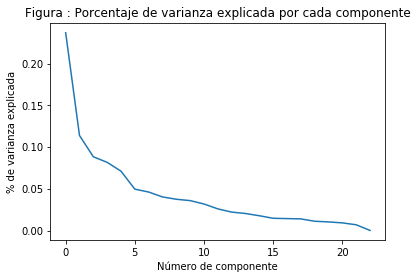

In [9]:
#Se obtiene la gráfica del porcentaje de varianza explicada
plt.plot(var_exp_ratio)
plt.title("Figura : Porcentaje de varianza explicada por cada componente")
plt.xlabel("Número de componente")
plt.ylabel("% de varianza explicada")

In [10]:
##Se obtiene la varianza explicada para cada componente principal (10) y la suma de dichos valores debe dar 80% que es el criterio seleccionado.
print(varianza_explicada)
print(varianza_explicada.sum()) 

[0.23692547 0.11384602 0.08834337 0.08170137 0.07111615 0.04958133
 0.04612466 0.0402719  0.03747905 0.03585593]
0.8012452557366838


In [11]:
print(var_exp_ratio) ##Ratio de varianza explicada 
print(var_exp_ratio[:10].sum())

[2.36925468e-01 1.13846015e-01 8.83433734e-02 8.17013669e-02
 7.11161480e-02 4.95813332e-02 4.61246638e-02 4.02719041e-02
 3.74790508e-02 3.58559322e-02 3.17927198e-02 2.59519549e-02
 2.21153503e-02 2.04113766e-02 1.77385355e-02 1.46927827e-02
 1.43290735e-02 1.39668837e-02 1.11392349e-02 1.03538827e-02
 9.18082227e-03 6.91711649e-03 1.65010749e-04]
0.8012452557366838


In [12]:
##Se obtienen los eigenvalues
eigenvalues

array([5.44991815, 2.61876222, 2.03213339, 1.87934951, 1.63586122,
       1.140503  , 1.06099038, 0.92636129, 0.8621182 , 0.82478215])

- Con el criterio de eigenvalues se observa que no todos son mayores a 1, por lo que esta medida nos dice que nos quedemos con 7 componentes y son los que usaremos para análisis posteriores.

In [13]:
componentes = componentes.loc[:,['principal_component_1', 'principal_component_2', 'principal_component_3', 'principal_component_4',
                                'principal_component_5', 'principal_component_6', 'principal_component_7']]

In [14]:
componentesprincipales = pd.DataFrame(componentesprincipales)
componentesprincipales_analisis_post = componentesprincipales.loc[:, [0, 1, 2, 3, 4, 5, 6]]

In [15]:
componentesprincipales_analisis_post = componentesprincipales_analisis_post.rename(columns = {0:'principal_component_1', 1:'principal_component_2', 
                                                                                              2:'principal_component_3', 3:'principal_component_4',
                                                                                              4:'principal_component_5', 5:'principal_component_6', 
                                                                                              6:'principal_component_7'})

In [16]:
##Se convierte a valor absoluto el dataframe para poder explicar qué preguntas se asocian a cada componente.
componentes = componentes.abs()

#### Interpretación de los componentes

- Primer componente principal

In [17]:
principal_component_1 = pd.Series(componentes['principal_component_1'])
principal_component_1.sort_values(ascending=False)

Riboflavin_mg    0.341325
Niacin_mg        0.337779
VitB6_mg         0.315663
Iron_mg          0.299857
Folate_mcg       0.284102
Thiamin_mg       0.272453
Zinc_mg          0.243551
Magnesium_mg     0.241348
Phosphorus_mg    0.199403
Fiber_g          0.181570
Copper_mcg       0.180806
VitB12_mcg       0.177985
Carb_g           0.169685
Calcium_mg       0.168112
Energy_kcal      0.157814
Protein_g        0.140620
VitE_mg          0.137122
VitA_mcg         0.133519
Manganese_mg     0.093567
Selenium_mcg     0.092319
VitC_mg          0.087639
Sugar_g          0.076323
Fat_g            0.033008
Name: principal_component_1, dtype: float64

Para el primer componente principal se asocian la vitamina _Riboflavin_ o vitamina B2, _Niacin_ o vitamina B3 y la vitamina B6. El porcentaje de varianza explicada de este componente es de 23.69%.   

- Segundo componente principal

In [18]:
principal_component_2 = pd.Series(componentes['principal_component_2'])
principal_component_2.sort_values(ascending=False)

Carb_g           0.443416
Sugar_g          0.358769
VitB12_mcg       0.355045
Protein_g        0.343397
Energy_kcal      0.273449
Fiber_g          0.257733
Selenium_mcg     0.239322
VitA_mcg         0.236470
Copper_mcg       0.212669
Zinc_mg          0.177798
Fat_g            0.111670
VitE_mg          0.106372
Calcium_mg       0.105173
Magnesium_mg     0.103361
Folate_mcg       0.097093
Iron_mg          0.093812
Manganese_mg     0.088783
Phosphorus_mg    0.087448
Niacin_mg        0.084801
Thiamin_mg       0.075150
Riboflavin_mg    0.073471
VitC_mg          0.038525
VitB6_mg         0.021129
Name: principal_component_2, dtype: float64

Para el segundo componente principal se asocian los carbohidratos, el azúcar y la vitamina B12. El porcentaje de varianza explicada de este componente principal es de 11.38%. 

- Tercer componente principal

In [19]:
principal_component_3 = pd.Series(componentes['principal_component_3'])
principal_component_3.sort_values(ascending=False)

Fat_g            0.534051
Energy_kcal      0.462006
Phosphorus_mg    0.274814
Folate_mcg       0.230985
Protein_g        0.213567
VitE_mg          0.207331
Magnesium_mg     0.201225
Riboflavin_mg    0.192098
Thiamin_mg       0.184351
VitB6_mg         0.174648
Niacin_mg        0.164885
Selenium_mcg     0.163361
VitC_mg          0.162303
Copper_mcg       0.152263
Calcium_mg       0.128139
Iron_mg          0.087109
Manganese_mg     0.072630
Sugar_g          0.055247
Carb_g           0.049822
Fiber_g          0.040397
Zinc_mg          0.038639
VitA_mcg         0.021929
VitB12_mcg       0.012760
Name: principal_component_3, dtype: float64

Para el tercer componente principal se asocian _Fat-soluble vitamins_ (vitaminas solubles en grasa), _Energy kcal_ y el Fósforo. El porcentaje de varianza explicada de este componente principal es de 8.83%.   

- Cuarto componente principal

In [20]:
principal_component_4 = pd.Series(componentes['principal_component_4'])
principal_component_4.sort_values(ascending=False)

VitA_mcg         0.530395
Copper_mcg       0.389929
VitB12_mcg       0.346550
Manganese_mg     0.311369
Protein_g        0.311112
Sugar_g          0.217373
Phosphorus_mg    0.207871
Carb_g           0.174108
Zinc_mg          0.166322
Selenium_mcg     0.161623
Niacin_mg        0.156394
VitB6_mg         0.114372
Thiamin_mg       0.103518
Calcium_mg       0.099340
Magnesium_mg     0.071805
Iron_mg          0.059443
Energy_kcal      0.052280
VitC_mg          0.047584
Riboflavin_mg    0.046996
Fiber_g          0.042130
Folate_mcg       0.032481
Fat_g            0.026520
VitE_mg          0.026174
Name: principal_component_4, dtype: float64

Para el cuarto componente principal se asocian vitamina A, _Copper_ (mineral) y la vitamina B12. El porcentaje de varianza explicada de este componente es de 8.17%

- Quinto componente principal

In [21]:
principal_component_5 = pd.Series(componentes['principal_component_5'])
principal_component_5.sort_values(ascending=False)

Fat_g            0.394450
Calcium_mg       0.388692
Magnesium_mg     0.352742
Phosphorus_mg    0.344929
Fiber_g          0.332161
Energy_kcal      0.293596
VitE_mg          0.238019
Niacin_mg        0.203433
Thiamin_mg       0.161520
Copper_mcg       0.161241
Riboflavin_mg    0.153460
Folate_mcg       0.137697
VitB6_mg         0.133747
Manganese_mg     0.125600
Iron_mg          0.097110
Carb_g           0.082723
Zinc_mg          0.064319
VitB12_mcg       0.058857
Sugar_g          0.048421
VitC_mg          0.024713
Protein_g        0.013176
VitA_mcg         0.008137
Selenium_mcg     0.005049
Name: principal_component_5, dtype: float64

Para el quinto componente principal se asocian _Fat-soluble vitamins_ (vitaminas solubles en grasa), el calcio y el magnesio. El porcentaje de varianza explicada para este componente principal es de 7.11%. 

- Sexto componente principal

In [22]:
principal_component_6 = pd.Series(componentes['principal_component_6'])
principal_component_6.sort_values(ascending=False)

VitC_mg          0.545219
VitE_mg          0.475300
Sugar_g          0.337022
Carb_g           0.279369
Selenium_mcg     0.243773
VitB6_mg         0.200525
Manganese_mg     0.182527
Protein_g        0.141469
Magnesium_mg     0.140120
Fiber_g          0.134870
Energy_kcal      0.132865
Thiamin_mg       0.130000
VitB12_mcg       0.123150
Fat_g            0.116492
Copper_mcg       0.086214
Phosphorus_mg    0.083792
Calcium_mg       0.070532
Folate_mcg       0.054688
Zinc_mg          0.054538
Riboflavin_mg    0.050758
VitA_mcg         0.039028
Iron_mg          0.030539
Niacin_mg        0.026277
Name: principal_component_6, dtype: float64

Para el sexto componente principal se asocian la vitamina C, E y el azúcar. El porcentaje de varianza explicada para este componente es de 4.96%.

- Séptimo componente principal

In [23]:
principal_component_7 = pd.Series(componentes['principal_component_7'])
principal_component_7.sort_values(ascending=False)

Calcium_mg       0.462817
VitC_mg          0.451276
Fiber_g          0.414733
Phosphorus_mg    0.323521
Sugar_g          0.298613
Magnesium_mg     0.269604
Riboflavin_mg    0.141794
Manganese_mg     0.136507
Iron_mg          0.133322
Folate_mcg       0.130939
VitE_mg          0.125438
Copper_mcg       0.119212
Zinc_mg          0.105925
VitA_mcg         0.101341
Thiamin_mg       0.071844
Energy_kcal      0.066823
VitB12_mcg       0.056077
Niacin_mg        0.045698
Fat_g            0.045318
VitB6_mg         0.024691
Carb_g           0.022079
Selenium_mcg     0.021893
Protein_g        0.006299
Name: principal_component_7, dtype: float64

Para el séptimo componente principal se asocian el calcio, la vitamina C y la fibra. El porcentaje de varianza explicada para este componente es de 4.61%.

In [24]:
componentesprincipales_analisis_post.to_csv('../../results/data_results/componentesprincipales_analisis_post.csv', index=False)